# K-Nearest Neighbors from Scratch
---
### Breast Cancer Wisconsin
Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

1. Title: Wisconsin Breast Cancer Database (January 8, 1991)

2. Sources:
   -- Dr. WIlliam H. Wolberg (physician)
      University of Wisconsin Hospitals
      Madison, Wisconsin
      USA
   -- Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
      Received by David W. Aha (aha@cs.jhu.edu)
   -- Date: 15 July 1992

3. Past Usage:

   Attributes 2 through 10 have been used to represent instances.
   Each instance has one of 2 possible classes: benign or malignant.

   1. Wolberg,~W.~H., \& Mangasarian,~O.~L. (1990). Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology. In
      {\it Proceedings of the National Academy of Sciences}, {\it 87},
      9193--9196.
      -- Size of data set: only 369 instances (at that point in time)
      -- Collected classification results: 1 trial only
      -- Two pairs of parallel hyperplanes were found to be consistent with
         50% of the data
         -- Accuracy on remaining 50% of dataset: 93.5%
      -- Three pairs of parallel hyperplanes were found to be consistent with
         67% of data
         -- Accuracy on remaining 33% of dataset: 95.9%

   2. Zhang,~J. (1992). Selecting typical instances in instance-based
      learning.  In {\it Proceedings of the Ninth International Machine
      Learning Conference} (pp. 470--479).  Aberdeen, Scotland: Morgan
      Kaufmann.
      -- Size of data set: only 369 instances (at that point in time)
      -- Applied 4 instance-based learning algorithms 
      -- Collected classification results averaged over 10 trials
      -- Best accuracy result: 
         -- 1-nearest neighbor: 93.7%
         -- trained on 200 instances, tested on the other 169
      -- Also of interest:
         -- Using only typical instances: 92.2% (storing only 23.1 instances)
         -- trained on 200 instances, tested on the other 169

4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:

   #####  Group 1 : 367 points: 200B 167M (January 1989)
   #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
   #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
   #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
   #####                  : Changed 0 to 1 in field 6 of sample 1219406
   #####                  : Changed 0 to 1 in field 8 of following sample:
   #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings  # To import for useless number for k
from matplotlib import style
from collections import Counter
import random
import pandas as pd

style.use("fivethirtyeight")

In [2]:
# Euclidean distance
# plot1 = [1, 2]
# plot2 = [3, 4]

# euclidean_distance = sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)
# print("Euclidean distance:", euclidean_distance)

In [3]:
# Hard coded groups of point.
#          class:       features         class:      features
dataset = {"b": [[1, 2], [2, 3], [3, 1]], "r": [[6, 5], [7, 7], [8, 6]]}
new_features = [5, 7]

In [4]:
def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn("K is set to a value less than total voting groups!")
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))  # Fast algorithm for calculating Euclidean distance
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]  # The closest and most common class
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

The data is classified as: 'r' - confidence: 1.0


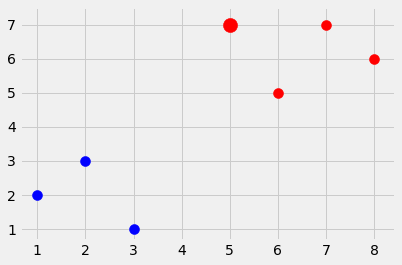

In [5]:
result, confidence = k_nearest_neighbors(dataset, new_features)
print("The data is classified as: '{}' - confidence: {}".format(result, confidence))
for class_color, features in dataset.items():
    for point in features:
        plt.scatter(point[0], point[1], s=100, color=class_color)
plt.scatter(new_features[0], new_features[1], s=200, color=result)
plt.show()

In [6]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace("?", -999999, inplace=True)
df.drop(["id"], 1, inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)
print(full_data[:3])

[[4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [8.0, 7.0, 8.0, 7.0, 5.0, 5.0, 5.0, 10.0, 2.0, 4.0], [1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 3.0, 1.0, 1.0, 2.0]]


In [7]:
test_size = 0.2
train_set = {2: [], 4: []}  # Class: (2 for benign, 4 for malignant)
test_set = {2: [], 4: []}  # Class: (2 for benign, 4 for malignant)
train_data = full_data[:-int(test_size * len(full_data))]  # 80% of the data
test_data = full_data[-int(test_size * len(full_data)):]  # 20% of the data

for entry in train_data:
    train_set[entry[-1]].append(entry[:-1])  # For every class appends the features
    
for entry in test_data:
    test_set[entry[-1]].append(entry[:-1])  # For every class appends the features

In [8]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print("Confidence on incorrect prediction:", confidence)
        total += 1
print("Accuracy:", correct / total)

Confidence on incorrect prediction: 1.0
Confidence on incorrect prediction: 0.8
Confidence on incorrect prediction: 0.6
Confidence on incorrect prediction: 0.6
Accuracy: 0.9712230215827338
